In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Data Generation

In [3]:
mean_01 = np.array([0.1,0.2])
mean_02 = np.array([5.1,5.2])

cov_01 = np.array([[1.0,0.2],[0.2,1.1]])
cov_02 = np.array([[1.0,0.3],[0.3,1.1]])

dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

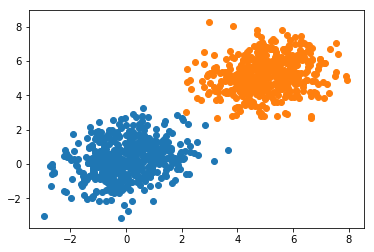

In [4]:
plt.scatter(dist_01[:,0],dist_01[:,1])
plt.scatter(dist_02[:,0],dist_02[:,1])

In [6]:
# Total Dataset
rows = dist_01.shape[0]+dist_02.shape[0]
cols = dist_01.shape[1]+1

data = np.zeros((rows,cols))
print(data.shape)

data[:dist_01.shape[0],:dist_01.shape[1]] = dist_01 # first 500 rows , first 2 col = dist_01
data[dist_01.shape[0]:rows,:dist_01.shape[1]] = dist_02 # first 500 rows , first 2 col = dist_02
data[dist_01.shape[0]:rows,-1]=1.0 # for all rows , on last col fill 1

(1000, 3)


In [7]:
np.random.shuffle(data)

data[:10]

array([[-0.34035169,  1.87141682,  0.        ],
       [ 5.74450998,  5.89441449,  1.        ],
       [-0.95118597,  0.73777341,  0.        ],
       [ 0.93858299, -0.29274457,  0.        ],
       [ 4.96076914,  4.71146404,  1.        ],
       [-0.88345361,  1.87927602,  0.        ],
       [ 4.84141683,  2.82157605,  1.        ],
       [ 7.31372283,  6.72875728,  1.        ],
       [ 0.4372614 ,  0.16561926,  0.        ],
       [ 1.02259777,  0.84716667,  0.        ]])

In [11]:
## data Splitting
split = int(0.75*data.shape[0])
X_train = data[:split,:-1]
Y_train = data[:split,-1]

X_test = data[split:,:-1]
Y_test = data[split:,-1]

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(750, 2)
(250, 2)
(750,)
(250,)


In [12]:
# function

def sigmoid(z):
    sig = 1.0/(1+np.exp(-1*z))
    return sig

def hypothesis(x_sample,w,b):
    h = (x_sample*w).sum()+b
    return sigmoid(h)

def get_error(x,w,y_true,b):
    err = 0.0
    m = x.shape[0]
    
    for ix in range(m):
        if y_true[ix] == 0:
            # print hypothesis(x[ix],w,b)
            add_term = -1*(np.log(1-hypothesis(x[ix],w,b)))
            err += add_term
        else:
            add_term = -1*(np.log(hypothesis(x[ix],w,b)))
            err += add_term
    
    err = err/m
    return err

In [17]:
def get_gradients(x,w,y_true,b):
    
    grad_w = np.zeros(w.shape[0])
    grad_b = 0
    
    m = x.shape[0]
    for ix in range(m):
        grad_w += (hypothesis(x[ix],w,b)-y_true[ix])* (x[ix])
        grad_b += (hypothesis(x[ix],w,b)-y_true[ix])*1
        
    return [grad_w,grad_b]

In [18]:
def optimizer(x,w,y_true,b,learning_rate=0.001):
    error = get_error(x,w,y_true,b)
    
    [grad_w,grad_b] = get_gradients(x,w,y_true,b)
    
    b = b- learning_rate*grad_b
    w = w- learning_rate*grad_w
    
    return error,w,b

In [15]:
def Logistics_Regression(X_train,Y_train,nb_epochs=2,learning_rate=0.0001):
    
    loss = []
    
    ## Parameter initialization
    W = np.array([0.3,0.2])
    b = 3.6
    
    for ix in range(nb_epochs):
        error, W, b = optimizer(X_train,W,Y_train,b,learning_rate)
        loss.append(error)
        
    W_final = W
    b_final = b
    
    return loss,W_final,b_final

In [42]:
loss,w,b = Logistics_Regression(X_train,Y_train)
print(loss)

[1.8328267651921941, 1.813644333945606]


In [45]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr = LogisticRegression()

lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
lr.score(X_test, Y_test)

0.996